# Master's Thesis: Investigating Maximum Rainfall Trends in Colorado

<b>Institution:</b> University of Georgia <br>
<b>Department:</b> Statistics <br>
<b>Student:</b> Jeremy Mulcahey <br>
<b>Advisor:</b> Dr. Lynne Seymour <br>
<b>Last Edit:</b> 9/27/2016

Section 0: Preparing data <br>
Section 1: Mean<br>
Section 2: Variance

##  Section 0: Preparing data

In [1]:
require(fitdistrplus); # required for parameter estimation
require(caTools);      # required for smoothing
require(repr);         # required for resizing plots in IRKernel
require("IRdisplay");  # graphic embedding
require(MASS);         # testing

Loading required package: fitdistrplus
Loading required package: MASS
Loading required package: survival
Loading required package: caTools
Loading required package: repr
Loading required package: IRdisplay


In [2]:
# establish working directorys
setwd("C:/Users/jerem/Desktop/UGA/Master'sThesis/")

Data files for individual station names.

In [3]:
data = read.csv(file = "data/BOULDER_MonMax_GHCN.csv", head=T)

Adjust the data for later use.

In [4]:
# Create an index as x - used as needed
month = seq(1,nrow(data),by=1)
data = cbind(data,month)

# first year of the data (changes by station name)
firstYear = data$YEAR[1]

# station name for plotting
stationName = as.character(data$STATION_NAME[1])

# -999 messed with the plotting - change to NA
data[data==-999] = NA

sum(is.na(data)) #print number of missing values

[1] 165

Check number of years in the data set.

In [5]:
data$YEAR[nrow(data)]-firstYear

[1] 116

In [6]:
table(data$MONTH)


  1   2   3   4   5   6   7   8   9  10  11  12 
117 117 117 117 117 117 117 117 117 117 117 117 

Make a data frame of all the 10 year periods following the first year for data collected at the station.

In [7]:
#create the first decade (first year and the following 9 years)
max_PRCP = data.frame(data[which(data$YEAR < (firstYear + 10)),6])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
for(year in c((data$YEAR[1] + 1):2005)){
    max_PRCP = cbind(max_PRCP,data[which(data$YEAR >= year & data$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP[max_PRCP==-999] = NA

## Section 1: Mean

In [8]:
options(repr.plot.width=9, repr.plot.height=5) #reduces the plot sizes

In [9]:
data2012 = data[which(data$YEAR<2013),]

In [10]:
# create for maximum rainfall
maxTS = ts(data$Max.PRCP, start = firstYear, freq=12)

# create regression line
reg = lm(Max.PRCP. ~ month, data=data)

In [11]:
maxTS2012 = ts(data2012$Max.PRCP, start = firstYear, freq=12)

In [12]:
maxTSNoEvent = maxTS

In [13]:
maxTSNoEvent[1389] = NA

In [14]:
maxObs = max(na.omit(data2012$Max.PRCP.))

In [15]:
smooth = runmean(data2012$Max.PRCP., 120)

In [16]:
smoothTS = ts(smooth, start=firstYear, freq=12)

In [17]:
which(data2012$Max.PRCP.==maxObs)

[1] 1060

In [18]:
data2012[1060,]

,STATION,STATION_NAME,YEAR,MONTH,Obs,Max.PRCP.,month
1060,GHCND:USC00050848,BOULDER CO US,1986,4,30,904,1060


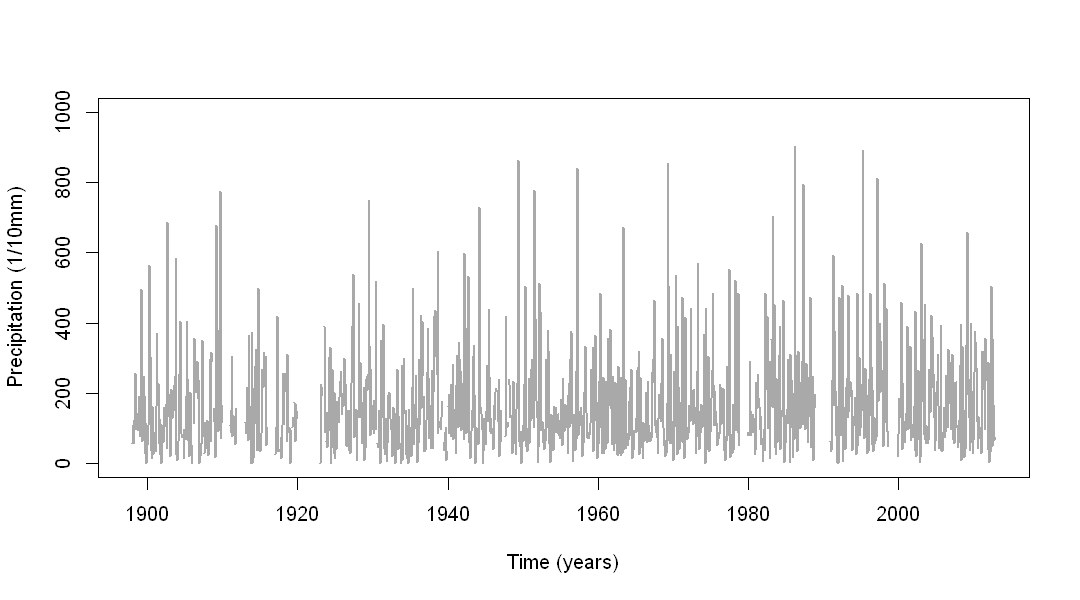

In [19]:
plot(maxTS2012, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,1000))

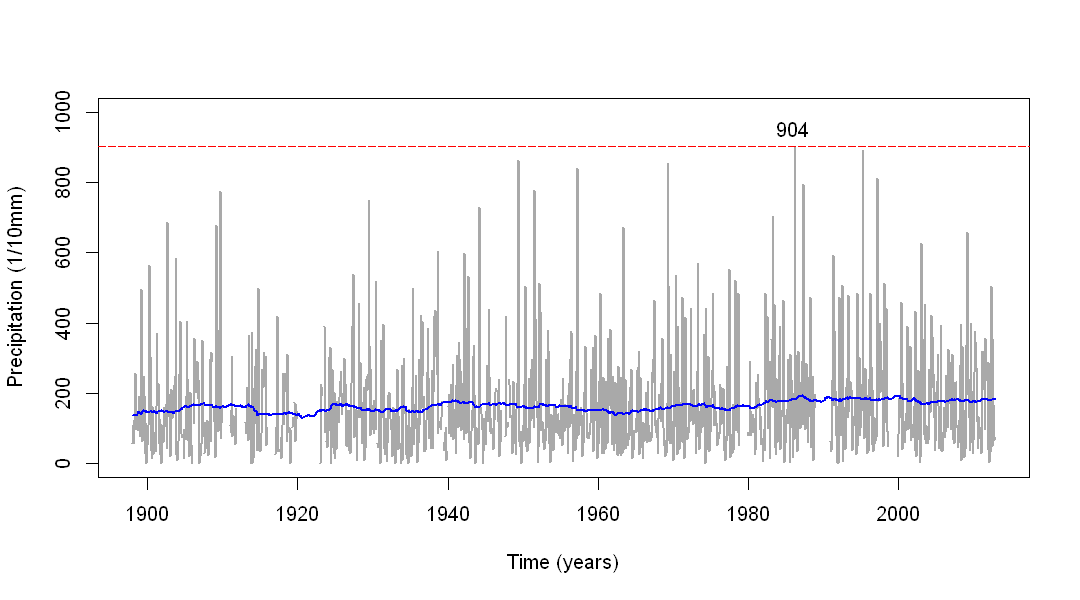

In [20]:
plot(maxTS2012, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,1000))
abline(h=maxObs, col="red", lwd=.5, lty=5)
points(smoothTS, col=4, type="l", lwd=2)
text(1986,maxObs+50,
           sprintf("%i",maxObs))

In [21]:
maxObs2 = max(na.omit(data$Max.PRCP.))

In [22]:
smooth2 = runmean(data$Max.PRCP., 120)

In [23]:
smoothTS2 = ts(smooth2, start=firstYear, freq=12)

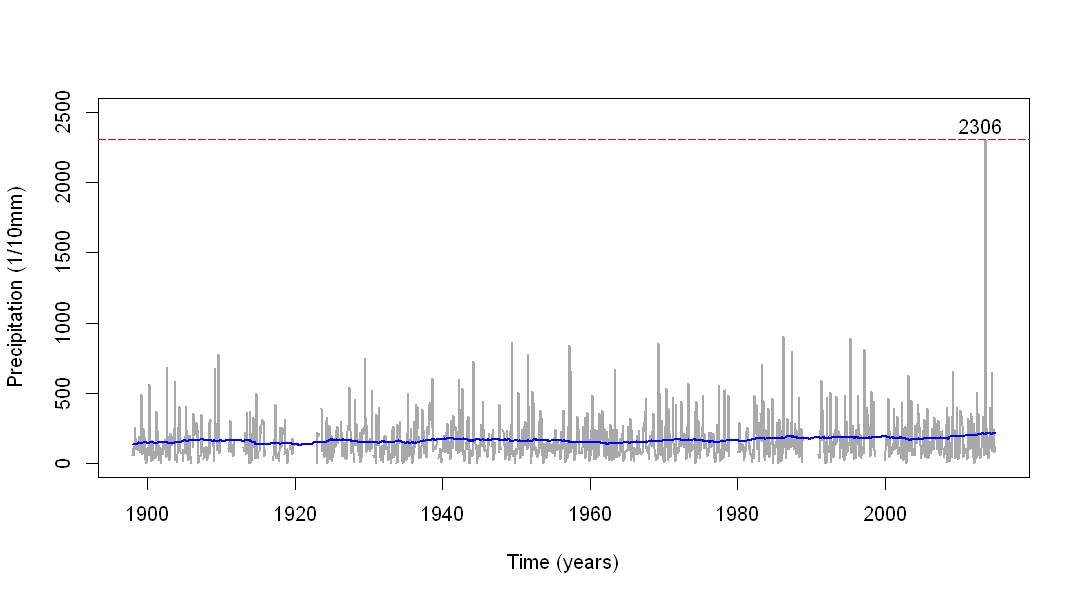

In [24]:
plot(maxTS, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,2500))
abline(h=maxObs2, col="red", lwd=.5, lty=5)
points(smoothTS2, col=4, type="l", lwd=2)
text(2013,maxObs2+100,sprintf("%i",maxObs2))

In [25]:
maxTSNoEvent = ts(maxTSNoEvent, start=firstYear, freq=12)

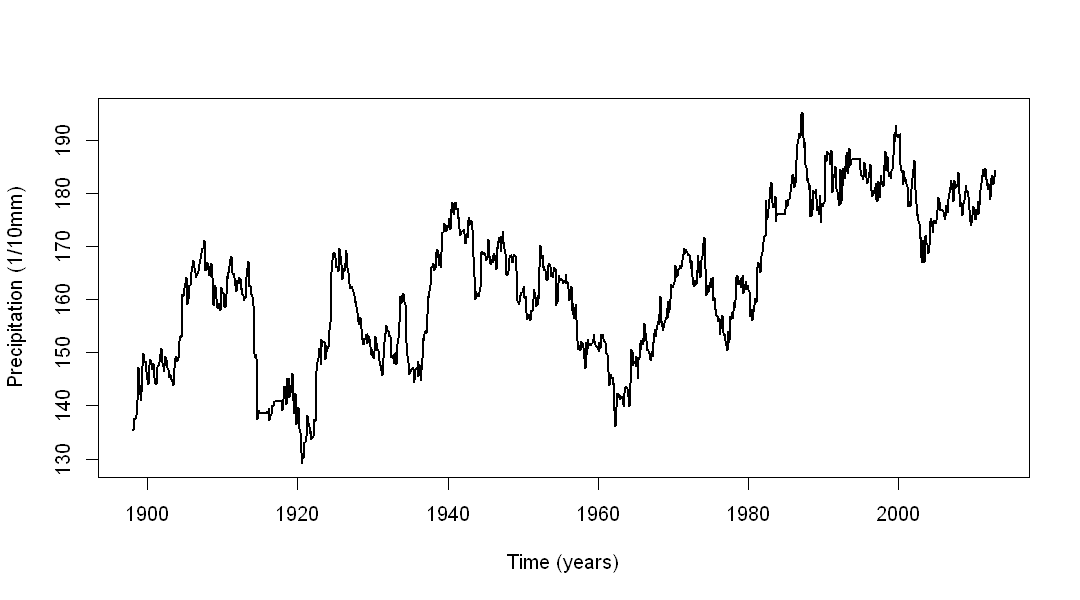

In [26]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )

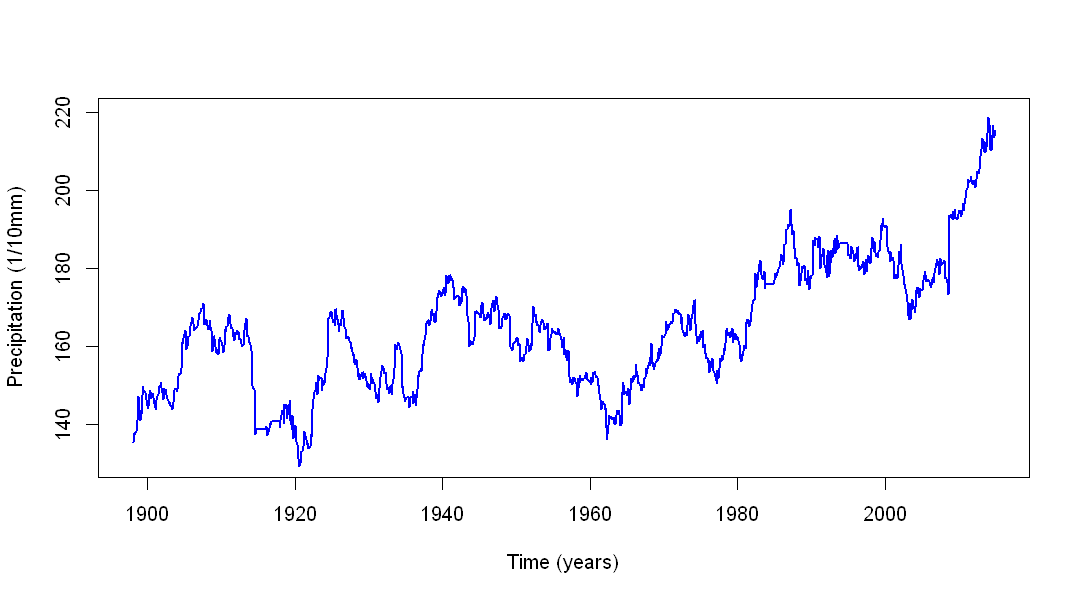

In [27]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 4, ylim=c(130,220)
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )

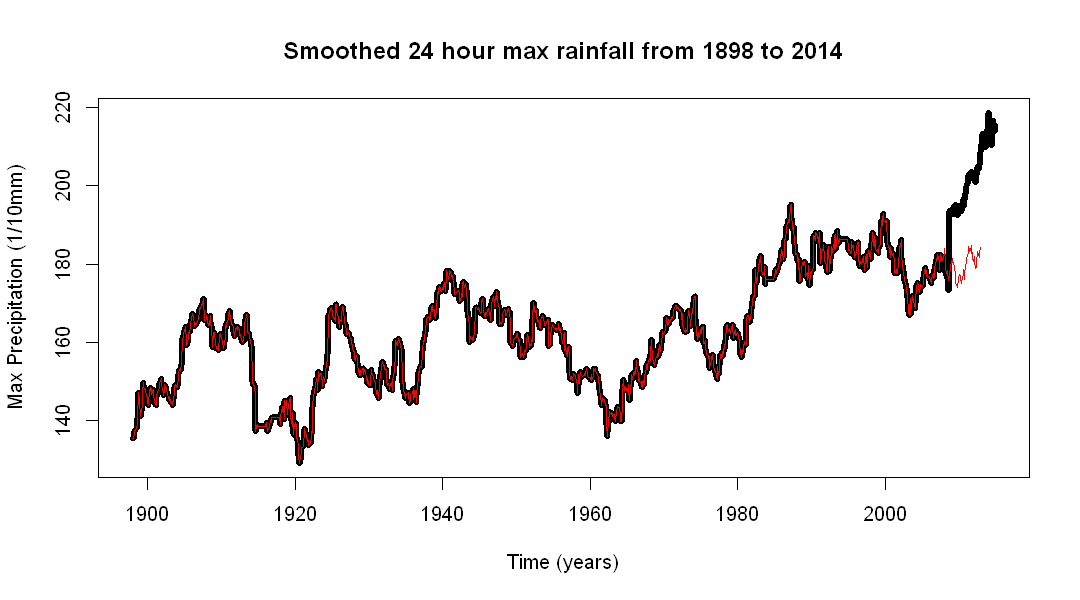

In [28]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=5,
    ylab = "Max Precipitation (1/10mm)", col = 1, main="Smoothed 24 hour max rainfall from 1898 to 2014")
lines(smoothTS, col=2)

In [29]:
means = apply(max_PRCP,2,mean)

In [30]:
sum(is.na(max_PRCP))

[1] 1642

Can't use the apply function with all the NAs

In [31]:
which(data$Max.PRCP.==maxObs2)

[1] 1389

In [32]:
data2= data

In [33]:
data2$Max.PRCP.[1389]=NA

In [34]:
smooth3 = runmean(data2$Max.PRCP., 120)

In [35]:
smoothTS3 = ts(smooth3, start = firstYear, freq=12)

In [36]:
#create the first decade (first year and the following 9 years)
max_PRCP2 = data.frame(data2[which(data2$YEAR < (firstYear + 10)),6])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
# i.e. 1898-1907, 1898-1908, etc
for(year in c((data2$YEAR[1] + 1):2005)){
    max_PRCP2 = cbind(max_PRCP2,data2[which(data2$YEAR >= year & data2$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP2) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP2[max_PRCP2==-999] = NA

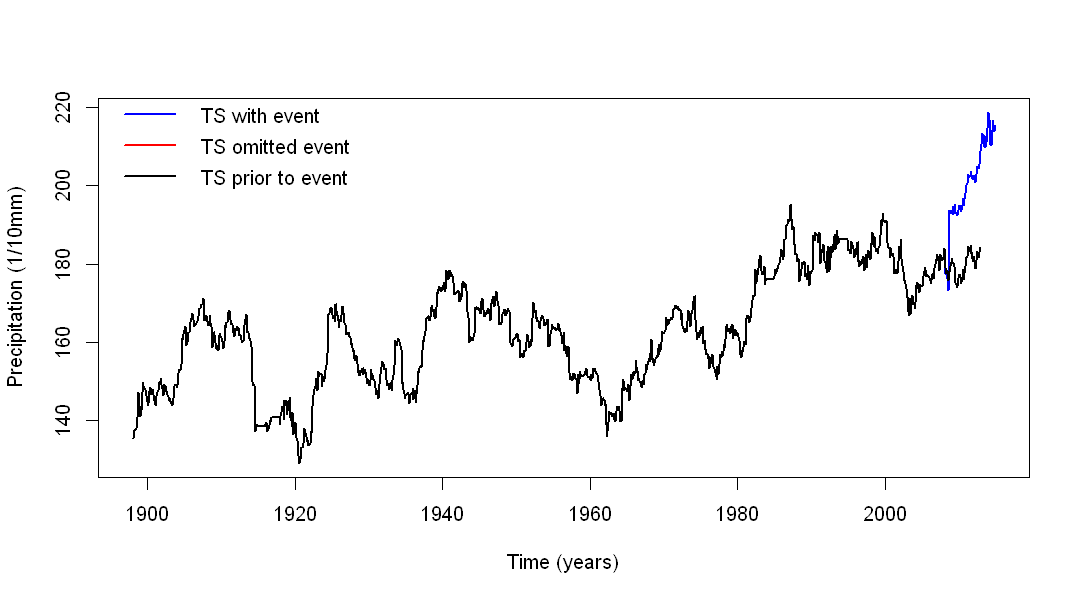

In [37]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 4, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
#lines(smoothTS3, col=2, lwd=2)
lines(smoothTS, col=1, lwd=2)
legend("topleft",c("TS with event","", "TS omitted event","", "TS prior to event"), lty = c(1,0,1,0,1),col=c(4,0,2,0,1),
      lwd=c(2,0,2,0,2), bty="n", cex = 1, pt.cex=1)

In [38]:
length(smoothTS2)-1284

[1] 120

In [39]:
truncSmoothTS = ts(smoothTS[1284:1320], start=2004, freq=12)
truncSmoothTS2 = ts(smoothTS2[1284:length(smoothTS2)], start=2004, freq=12)
truncSmoothTS3 = ts(smoothTS3[1284:length(smoothTS3)], start=2004, freq=12)

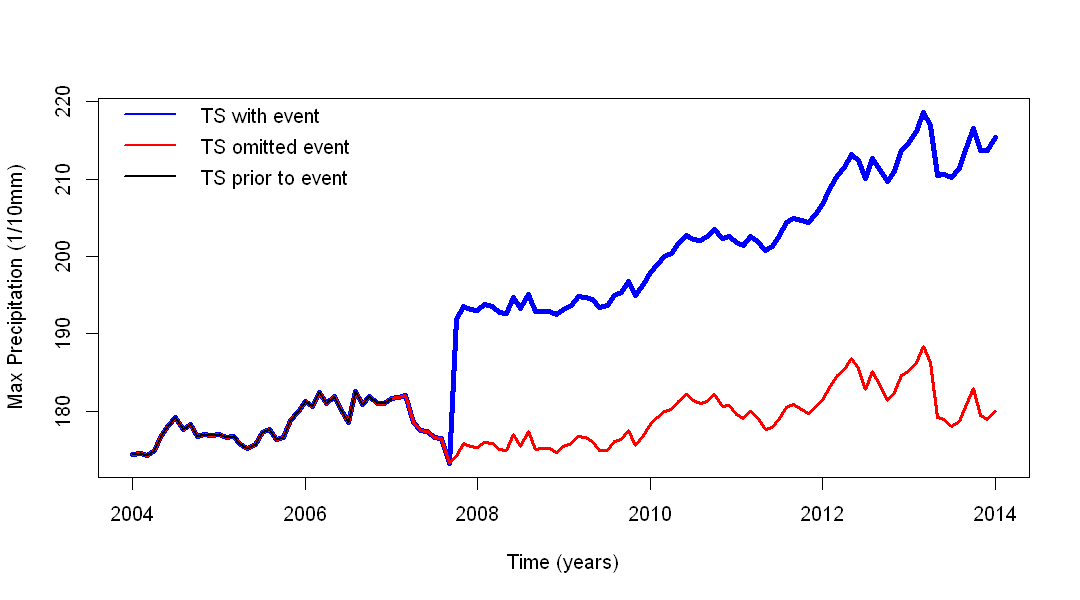

In [40]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(truncSmoothTS2, type="l", xlab = "Time (years)", lwd=4,
    ylab = "Max Precipitation (1/10mm)", col = 4, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
lines(truncSmoothTS3, col=2, lwd=3)
lines(truncSmoothTS, col=1, lwd=2)
legend("topleft",c("TS with event","", "TS omitted event","", "TS prior to event"), lty = c(1,0,1,0,1),col=c(4,0,2,0,1),
      lwd=c(2,0,2,0,2), bty="n", cex = 1, pt.cex=1)

In [41]:
smoothALL = runmean(data2$Max.PRCP., 1404/2)

In [42]:
smoothAllTS = ts(smoothALL, start=firstYear, freq = 12)

In [43]:
smoothALLEvent = runmean(data$Max.PRCP., 1404/2)

In [44]:
smoothAllEventTS = ts(smoothALLEvent, start = firstYear, freq = 12)

In [45]:
length(smoothAllTS)

[1] 1404

In [46]:
1404/2

[1] 702

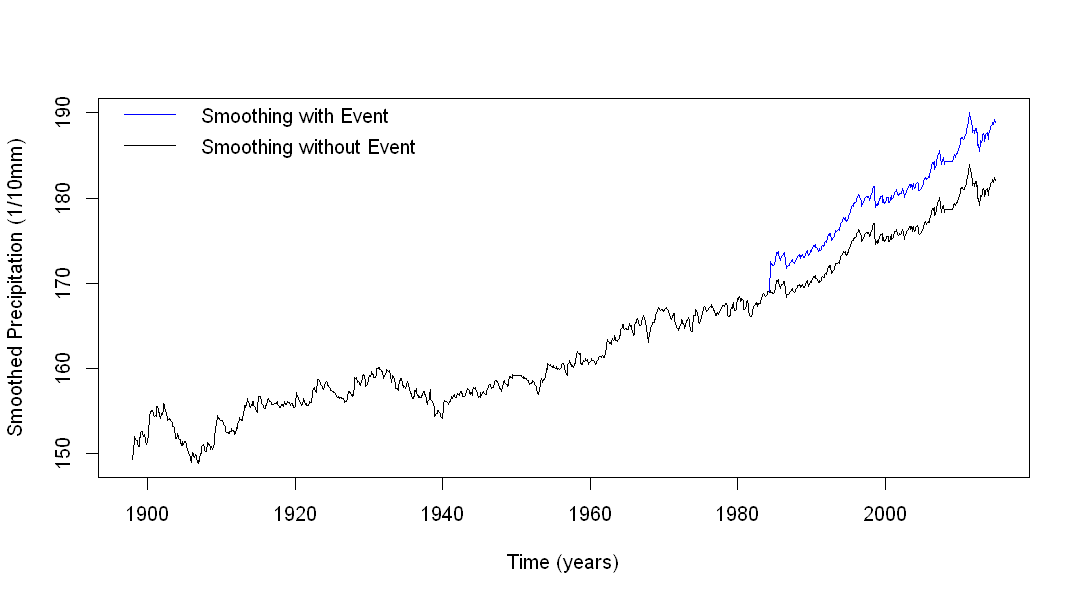

In [47]:
plot(smoothAllEventTS, type="l", col="blue", ylab="Smoothed Precipitation (1/10mm)", xlab="Time (years)")
lines(smoothAllTS)
legend("topleft",c("Smoothing with Event","", "Smoothing without Event"), col = c(4,0,1),, lty=c(1,0,1), bty="n")

### Change point detection for mean signal

In [48]:
means1TS

ERROR: Error in eval(expr, envir, enclos): object 'means1TS' not found


In [ ]:
means1TS[81]

In [49]:
data1st = data[which(data$YEAR<=1981),]
data2nd = data[-which(data$YEAR<=1981),]

In [50]:
mean1sthalf = mean(na.omit(data1st$Max.PRCP.))
v1 = var(na.omit(data1st$Max.PRCP.))
mean2ndhalf = mean(na.omit(data2nd$Max.PRCP.))
v2 = var(na.omit(data2nd$Max.PRCP.))

In [51]:
unique(data1st$YEAR)

[1] 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912
[16] 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
[31] 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942
[46] 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957
[61] 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
[76] 1973 1974 1975 1976 1977 1978 1979 1980 1981

In [52]:
anotherTS = smoothTS

In [53]:
require(changepoint)

Loading required package: changepoint
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Successfully loaded changepoint package version 2.2.1
 NOTE: Predefined penalty values have changed.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.


In [54]:
cpt.mean(anotherTS)

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              date version data.set cpttype method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Tue Sep 13 17:22:34 2016 

summary(.)  :
----------
Created Using changepoint version 2.2.1 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 21.68952 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 1007 

In [55]:
shapiro.test(smoothTS)


	Shapiro-Wilk normality test

data:  smoothTS
W = 0.98121, p-value = 1.981e-12


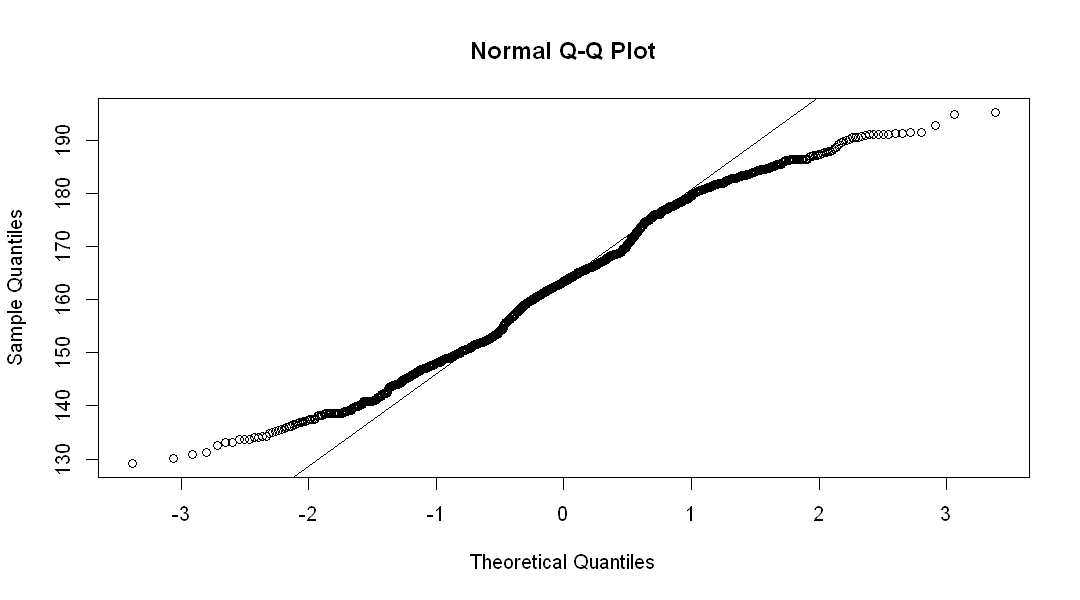

In [56]:
qqnorm(smoothTS);qqline(smoothTS)

In [99]:
#setEPS()
#postscript("pics/tri.eps")
#hist(smoothTS,breaks=40,xlab="Precipitation (1/10mm)", main="")
#dev.off()

png 
  2

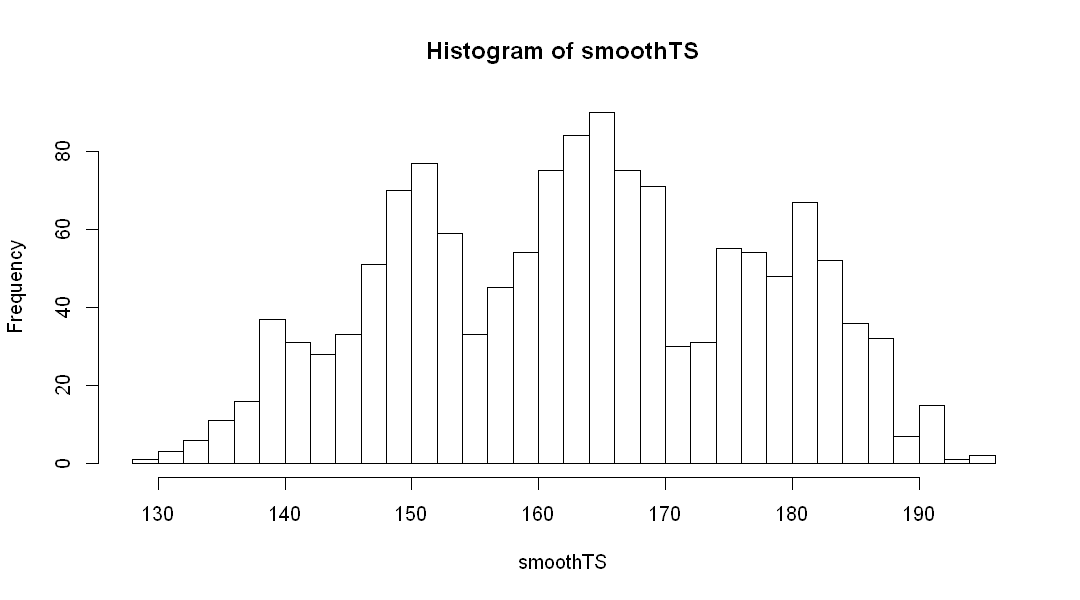

In [58]:
hist(smoothTS,breaks=40)

In [59]:
smoothTS[998:1010]

[1] 159.6442 159.5000 166.0385 166.9712 166.0000 166.8558 165.4904 165.1731
 [9] 166.2019 168.1058 168.7885 169.6635 170.7692

In [60]:
anotherTS[998:1002]

[1] 159.6442 159.5000 166.0385 166.9712 166.0000

In [61]:
996/12

[1] 83

In [62]:
1897+83

[1] 1980

In [63]:
length(smoothTS)/12

[1] 115

In [64]:
anotherTS[1:1007] = mean1sthalf
anotherTS[1008:length(smoothTS)] = mean2ndhalf

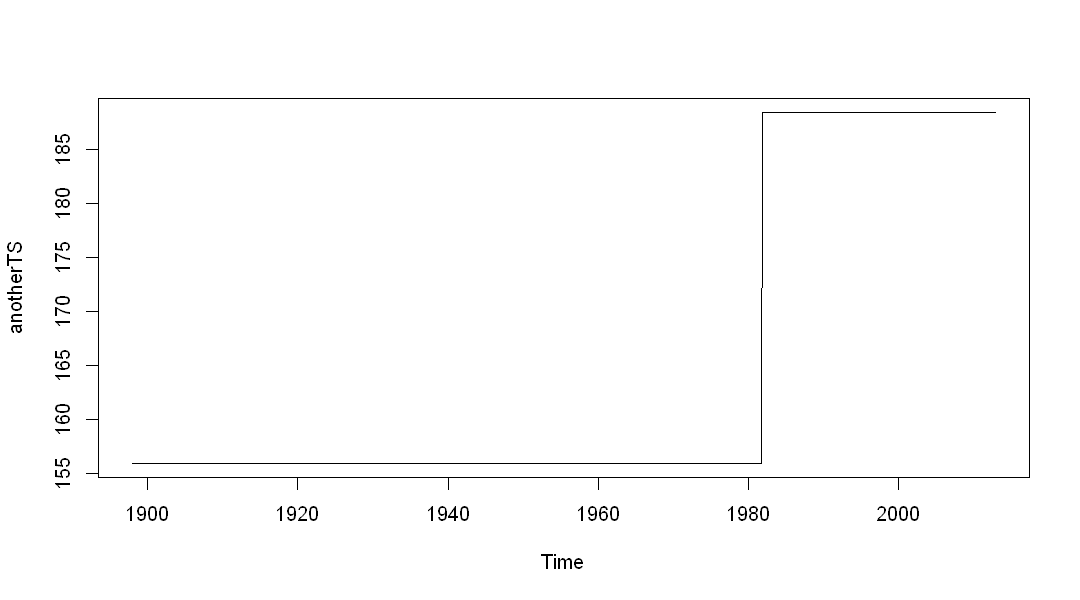

In [65]:
plot(anotherTS)

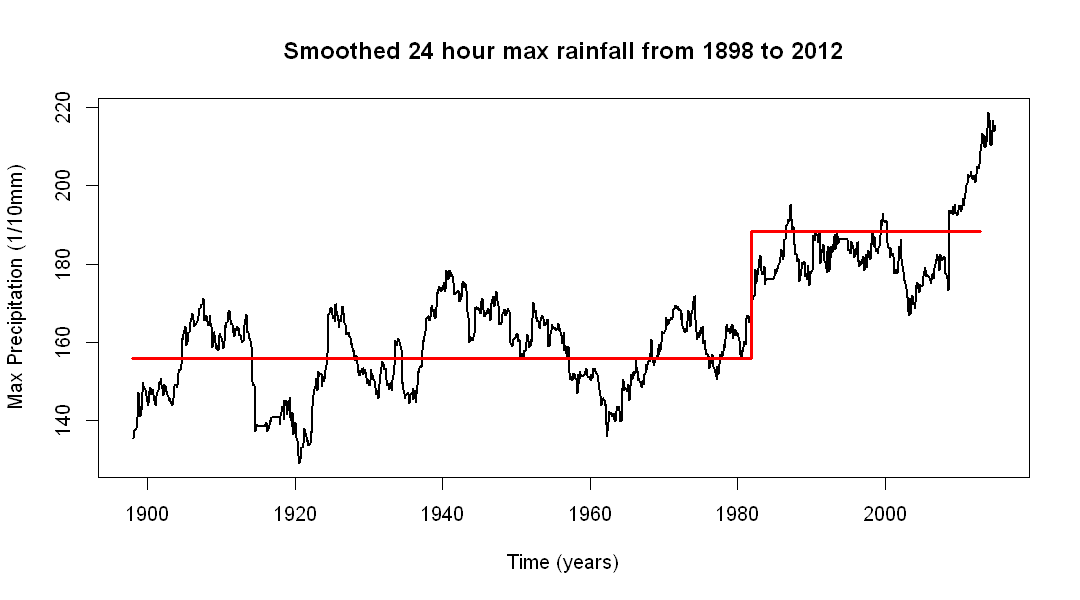

In [66]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 1, main="Smoothed 24 hour max rainfall from 1898 to 2012")
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")
    lines(anotherTS,col=2,lwd=3)

In [67]:
data1st2 = data2[which(data2$YEAR<=1981),]
data2nd2 = data2[-which(data2$YEAR<=1981),]

In [68]:
mean1sthalf2 = mean(na.omit(data1st2$Max.PRCP.))
mean2ndhalf2 = mean(na.omit(data2nd2$Max.PRCP.))

In [69]:
mean2ndhalf

[1] 188.4023

In [70]:
mean2ndhalf2

[1] 182.3864

In [71]:
anotherTS2 = anotherTS

In [72]:
anotherTS2[1:1007] = mean1sthalf2
anotherTS2[1008:length(smoothTS)] = mean2ndhalf2

In [73]:
mean1sthalf2

[1] 155.9537

In [74]:
mean2ndhalf2

[1] 182.3864

In [75]:
smoothTS[1048]

[1] 177.6238

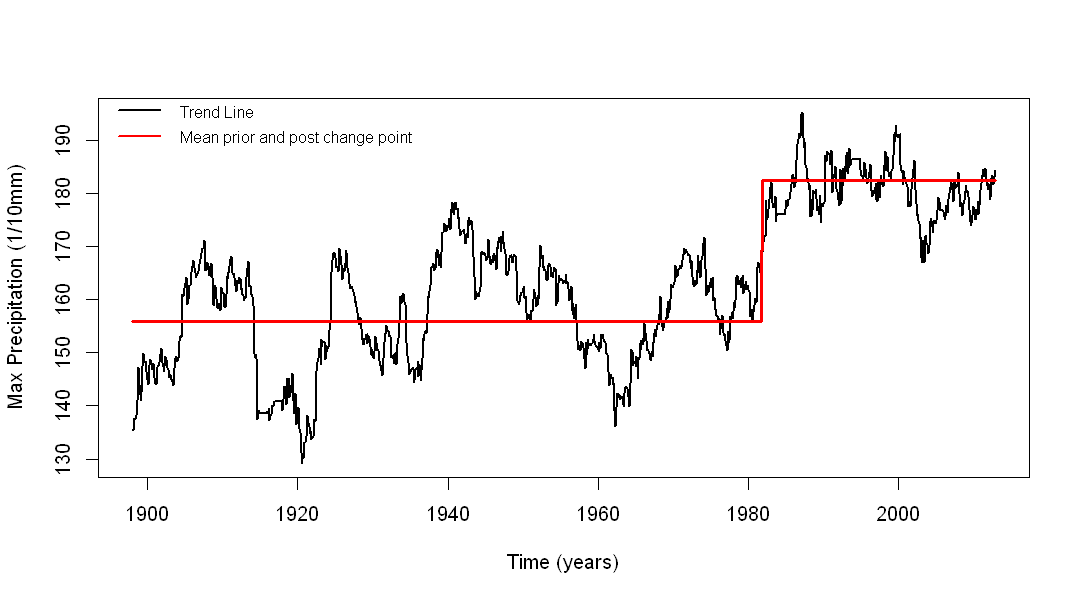

In [76]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 1, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2012"
    )
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")
    lines(anotherTS2,col=2,lwd=3)
    legend("topleft",c("Trend Line","","Mean prior and post change point"), lty=c(1,0,1), lwd=c(2,0,2), col=c(1,0,2),
    bty="n", cex = .8, pt.cex=.8)

In [77]:
length(smoothTS)

[1] 1380

In [78]:
length(smoothTS2)

[1] 1404

In [79]:
data["box"] = as.numeric(data$YEAR>=1981)

In [80]:
data2["box"] = as.numeric(data2$YEAR>=1981)

In [81]:
mean(na.omit(data2[which(data2$box == 0),"Max.PRCP."]))

[1] 156.3398

In [82]:
mean(na.omit(data2[which(data2$box == 1),"Max.PRCP."]))

[1] 180.5879

In [83]:
var(na.omit(data2[which(data2$box == 0),"M`ax.PRCP."]))

Warning message:
In is.na(object): is.na() applied to non-(list or vector) of type 'NULL'

ERROR: Error in var(na.omit(data2[which(data2$box == 0), "M`ax.PRCP."])): 'x' is NULL


In [84]:
var(na.omit(data2[which(data2$box == 1),"Max.PRCP."]))

[1] 21874.09

Box plots with noise from the event

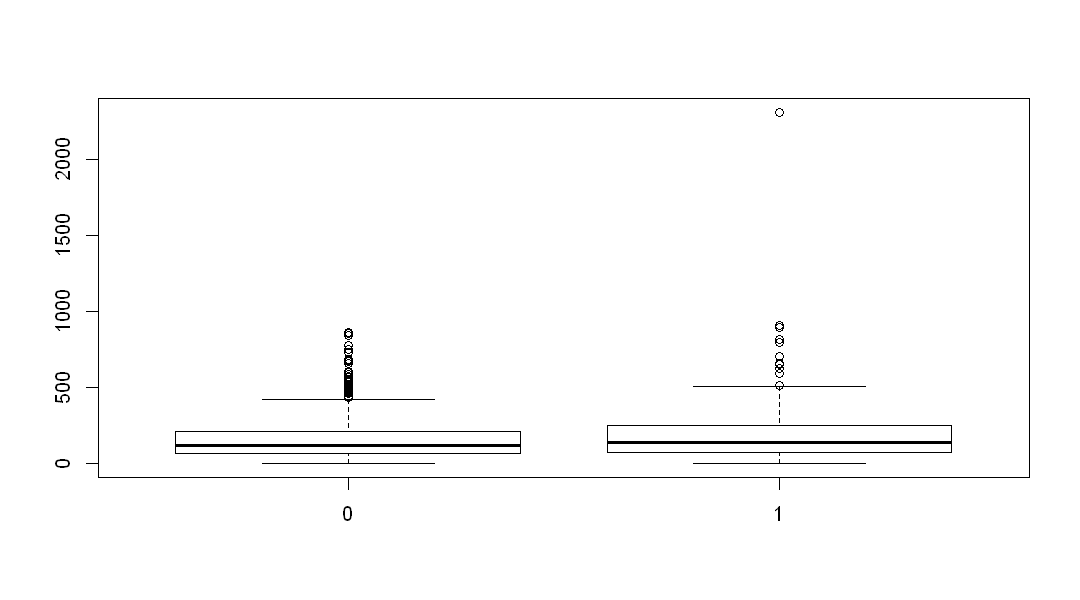

In [85]:
boxplot(data$Max.PRCP.~data$box)

A little less noise in the box plots by removing the event

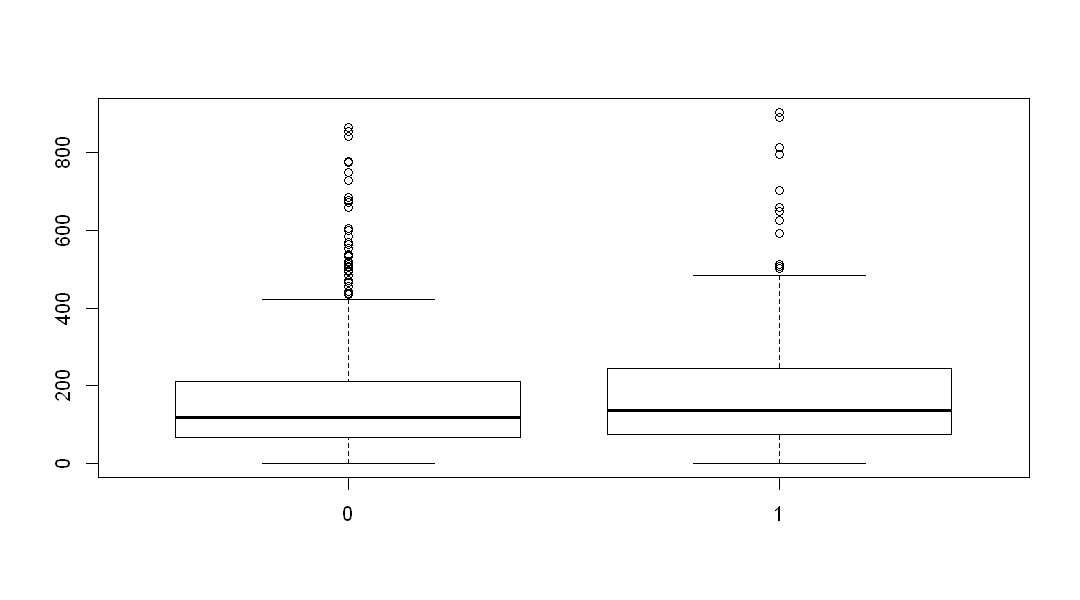

In [86]:
boxplot(data2$Max.PRCP.~data2$box)

In [87]:
indicator = c(rep(0,1007),rep(1,373))

In [88]:
length(indicator)

[1] 1380

In [89]:
1380/12

[1] 115

In [90]:
meansBox = as.data.frame(cbind(smoothTS,indicator))

In [91]:
meansBoxSea = as.data.frame(cbind(smoothTS, rep(c(1,2,3,4,5,6,7,8,9,10,11,12),115)))

In [92]:
names(meansBoxSea) = c("precipitation","month")

Now, can see the difference in the mean of the smoothed signals, however, given the actual variance of the data, the significance here is debatable - not to mention the independence assumption is not valid.

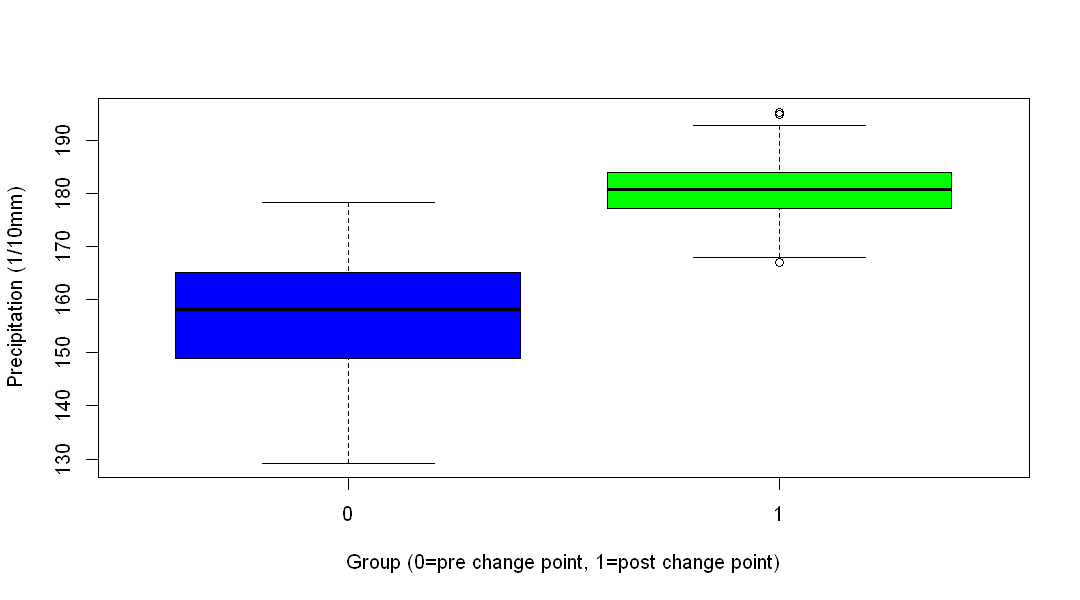

In [93]:
boxplot(meansBox$smoothTS ~ meansBox$indicator, xlab = "Group (0=pre change point, 1=post change point)",
       col = c("blue","green"), ylab = "Precipitation (1/10mm)")

#  Variances

In [94]:
vars1 = NULL
for(i in 1:(length(max_PRCP))){
    vars1 = c(vars1,var(na.omit(max_PRCP2[,i])))
}
vars1TS = ts(vars1, start = firstYear)

In [95]:
vars1TS

Time Series:
Start = 1898 
End = 2005 
Frequency = 1 
  [1] 15735.445 16735.987 21717.573 21413.277 20911.507 20214.089 19024.025
  [8] 19370.459 19138.029 20172.380 20669.951 19906.785 11160.880 11160.880
 [15] 12257.411 12257.411 12403.928 10693.007  9738.124  9159.137 10643.624
 [22] 12057.087 16897.540 16811.445 16855.751 15592.587 15460.528 15301.591
 [29] 16331.526 17620.114 16467.833 19074.140 15891.415 14795.405 14265.135
 [36] 17592.027 17560.073 20464.765 19856.686 18820.315 19267.625 15618.359
 [43] 19993.306 21174.749 24261.373 23429.325 23363.168 19541.288 18462.987
 [50] 19181.076 24157.529 24284.032 20359.226 20334.972 17473.730 15668.663
 [57] 17485.983 17917.805 18603.220 17700.123 12800.595 12895.826 18311.969
 [64] 19158.864 19788.176 19715.589 18549.150 19624.154 19825.643 19614.951
 [71] 20238.990 23020.257 18520.727 16617.942 15134.727 17396.821 20128.606
 [78] 20188.919 19639.970 25445.023 26833.222 24427.260 24427.260 26299.775
 [85] 28620.467 28642.189 25127.82

In [96]:
rollSmall = ts(runmean(vars1TS,15),start=firstYear)
rollSmall2 = ts(runmean(vars1TS,30),start=firstYear)
rollSmall3 = ts(runmean(vars1TS,50),start=firstYear)

In [100]:
setEPS()
postscript("pics/var1.eps")
plot(vars1TS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)^2", col = 1)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)
legend("topleft",c("Variance, of Intervals","","Small Smoothing", "","Medium Smoothing","","Large Smoothing"),
      col = c(1,0,3,0,2,0,4), lty = c(1,0,1,0,1,0,1), lwd=c(2,2,2,2), bty="n")
dev.off()

png 
  2

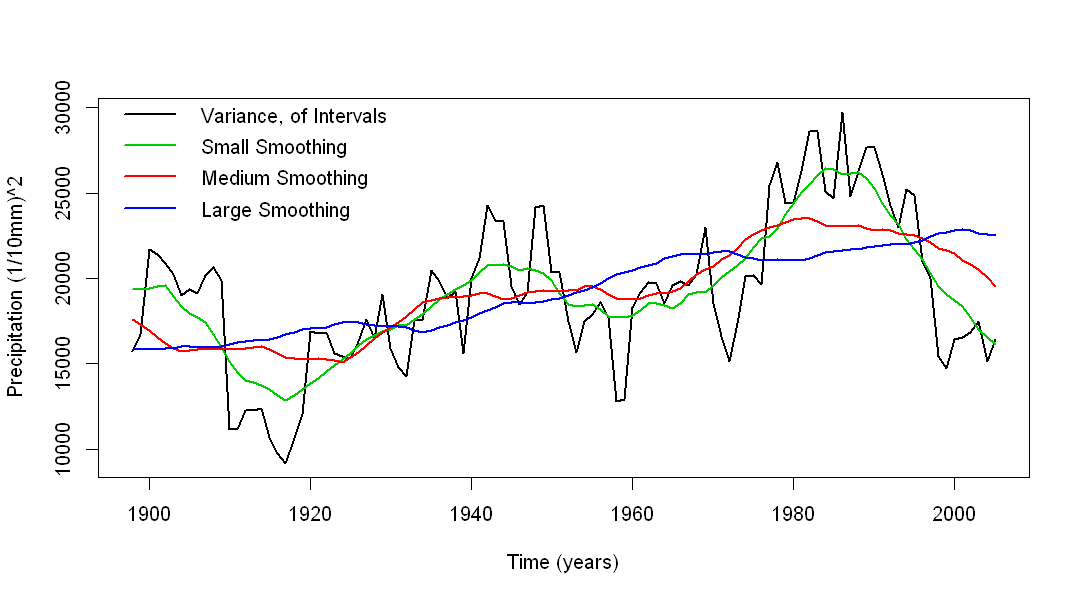

In [97]:
plot(vars1TS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)^2", col = 1)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)
legend("topleft",c("Variance, of Intervals","","Small Smoothing", "","Medium Smoothing","","Large Smoothing"),
      col = c(1,0,3,0,2,0,4), lty = c(1,0,1,0,1,0,1), lwd=c(2,2,2,2), bty="n")

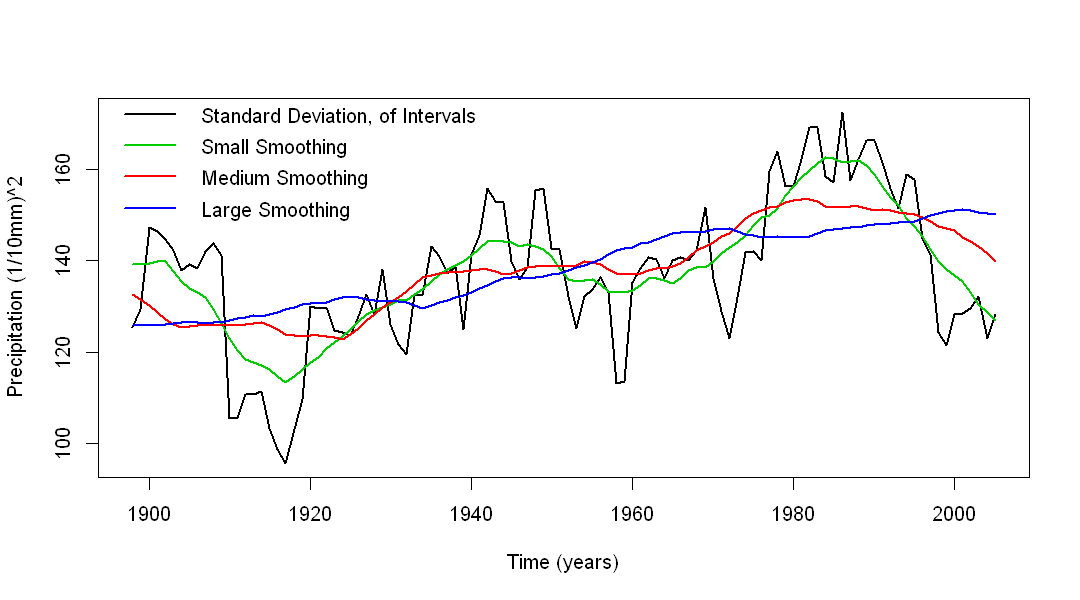

In [98]:
plot(sqrt(vars1TS), type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)^2", col = 1)
lines(sqrt(rollSmall), col=3,lwd=2)
lines(sqrt(rollSmall2), col=2,lwd=2)
lines(sqrt(rollSmall3), col=4,lwd=2)
legend("topleft",c("Standard Deviation, of Intervals","","Small Smoothing", "","Medium Smoothing","","Large Smoothing"),
      col = c(1,0,3,0,2,0,4), lty = c(1,0,1,0,1,0,1), lwd=c(2,2,2,2), bty="n")